## 1. Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = 100

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
df_train=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/house_price/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.shape

(1460, 81)

In [8]:
df_test=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/house_price/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
df_test.shape

(1459, 80)

## 2. Exploratory Data Analysis

We can combine both the datasets for performing EDA and feature engineering.During Model Building, we can separate it again.

In [10]:
df_train['source']='train'
df_test['source']='test'

df_price=pd.concat([df_train,df_test],ignore_index=True)

In [11]:
#Performing EDA with the dataset

In [12]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

From the above output, we can see that MSSubClass,OverallCond,OverallQual columns has been misinterpreted as integer columns.We need to set it as object column.

In [13]:
df_price['MSSubClass']=df_price['MSSubClass'].astype('O')
df_price['OverallCond']=df_price['OverallCond'].astype('O')
df_price['OverallQual']=df_price['OverallQual'].astype('O')

Dropping the Id column since we do not require it for our analysis

In [14]:
#summary statistics for numerical columns
df_price.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,69.305795,10168.114080,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,23.344905,7886.996359,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,59.000000,7478.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,68.000000,9453.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,80.000000,11570.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [15]:
#summary statistics for categorcal columns
df_price.describe(include='object')

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,source
count,2919,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919,2919
unique,16,5,2,2,4,4,2,5,3,25,9,8,5,8,10,9,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6,2
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal,train
freq,1079,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,825,1645,2310,2876,1025,1014,1742,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402,1460


Since there are only 10 values for PoolQC and PoolArea has the area of these pools only, we can drop both the values.

In [16]:
df_price=df_price.drop(['PoolQC','PoolArea'],axis=1)

In [17]:
df_price.shape

(2919, 80)

In [18]:
#Treating the Outliers for the numerical columns

In [19]:
def boundaries(df,variable):
    LL=(df[variable].quantile(.25))-(1.5*(df[variable].quantile(.75)-df[variable].quantile(.25)))
    UL=(df[variable].quantile(.75))+(1.5*(df[variable].quantile(.75)-df[variable].quantile(.25)))
    return LL,UL

In [20]:
df_price_num_features=df_price.select_dtypes(include=np.number)
df_price_num_features.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
outliers=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']

In [22]:
for i in outliers:
    LL,UL=boundaries(df_price,i)
    
    df_price[i]=np.where(df_price[i]<LL,LL,
                         np.where(df_price[i]>UL,UL,df_price[i]))

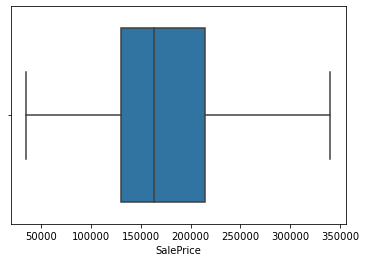

In [23]:
#Quick checking with SalePrice column if outliers are treated or not

sns.boxplot(x='SalePrice',data=df_price)
plt.show()

We can see that the outliers have been treated now.

In [24]:
#Finding the Missing Values and Treating them

In [25]:
miss_value=df_price.isnull().sum()
df_miss_value=pd.DataFrame()
df_miss_value['Values']=miss_value[miss_value>0]
df_miss_value['Percentage']=(miss_value[miss_value>0]/len(miss_value[miss_value>0])).round(2)
df_miss_value['Data_Type']=df_price[df_miss_value.index].dtypes
df_miss_value.sort_values('Values',ascending=False)

,Values,Percentage,Data_Type
MiscFeature,2814,82.76,object
Alley,2721,80.03,object
Fence,2348,69.06,object
SalePrice,1459,42.91,float64
FireplaceQu,1420,41.76,object
LotFrontage,486,14.29,float64
GarageCond,159,4.68,object
GarageQual,159,4.68,object
GarageFinish,159,4.68,object
GarageYrBlt,159,4.68,float64


In [26]:
print('Total number of missing value columns: {}'.format(len(df_miss_value)))

Total number of missing value columns: 34


From the above output, we can segregate the miss value columns into numerical and categorical columns and treat them accordingly

In [27]:
#Missing Value Treatment for categorical columns

In [28]:
cat_missing_value=df_miss_value[df_miss_value.Data_Type=='object']
cat_missing_value.sort_values('Values',ascending=False)

,Values,Percentage,Data_Type
MiscFeature,2814,82.76,object
Alley,2721,80.03,object
Fence,2348,69.06,object
FireplaceQu,1420,41.76,object
GarageFinish,159,4.68,object
GarageQual,159,4.68,object
GarageCond,159,4.68,object
GarageType,157,4.62,object
BsmtExposure,82,2.41,object
BsmtCond,82,2.41,object


In [29]:
#we will fill the NA values in MiscFeature with None value
df_price['MiscFeature']=df_price['MiscFeature'].fillna('None')

In [30]:
#For Alley,Fence,FireplaceQu columns, we can fill the NA values with No alley access,No fence, No Fireplace respectively.

df_price['Alley']=df_price['Alley'].fillna('No Alley access')
df_price['Fence']=df_price['Fence'].fillna('No Fence')
df_price['FireplaceQu']=df_price['FireplaceQu'].fillna('No Fireplace')

In [31]:
#For GarageType,GarageFinish,GarageQual,GarageCond columns, we will fill the NA values with No Garage.

cols=['GarageType','GarageFinish','GarageQual','GarageCond']

for col in cols:
    df_price[col]=df_price[col].fillna('No Garage')

In [32]:
#For BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1 columns, we will fill the NA values with No Basement,

cols=['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']

for col in cols:
    df_price[col]=df_price[col].fillna('No Basement')

In [33]:
#we will fill the NA values in MiscFeature with None value
df_price['MasVnrType']=df_price['MasVnrType'].fillna('None')

In [34]:
#we will fill the NA values in MSZoning,Functional,Utilities,Electrical,KitchenQual,Exterior2nd,Exterior1st,SaleType with their respective mode value
cols=['MSZoning','Functional','Utilities','Electrical','KitchenQual','Exterior2nd','Exterior1st','SaleType']

for col in cols:
    df_price[col]=df_price[col].fillna(df_price[col].mode()[0])

In [35]:
#Missing Value Treatment for numerical columns

In [36]:
num_missing_value=df_miss_value[df_miss_value.Data_Type!='object']
num_missing_value.sort_values('Values',ascending=False)

,Values,Percentage,Data_Type
SalePrice,1459,42.91,float64
LotFrontage,486,14.29,float64
GarageYrBlt,159,4.68,float64
MasVnrArea,23,0.68,float64
BsmtFullBath,2,0.06,float64
BsmtHalfBath,2,0.06,float64
BsmtFinSF1,1,0.03,float64
BsmtFinSF2,1,0.03,float64
BsmtUnfSF,1,0.03,float64
TotalBsmtSF,1,0.03,float64


In [37]:
#we will fill the NA values in LotFrontage with its median value
df_price['LotFrontage']=df_price['LotFrontage'].fillna(df_price['LotFrontage'].median())

In [38]:
#we will fill the NA values in GarageYrBlt with 0 stating there are no garages.
df_price['GarageYrBlt']=df_price['GarageYrBlt'].fillna(0)

In [39]:
#we will fill the NA values in MasVnrArea with its median value
df_price['MasVnrArea'].median()

0.0

In [40]:
#### Since the median value is 0, we need to check it with MSSubClass.

In [41]:
missing_index=df_price.loc[df_price.MasVnrArea.isnull(),['MasVnrArea','MSSubClass']]
missing_index

,MasVnrArea,MSSubClass
234,NaN,60
529,NaN,20
650,NaN,60
936,NaN,20
973,NaN,20
977,NaN,120
1243,NaN,20
1278,NaN,60
1691,NaN,60
1706,NaN,20


In [42]:
### The above output shows us the location where NA values for MasVnrArea are present.

In [43]:
df1=df_price.groupby('MSSubClass')['MasVnrArea'].median()
df1

MSSubClass
20      0.0
30      0.0
40      0.0
45      0.0
50      0.0
60     72.0
70      0.0
75      0.0
80     50.0
85      0.0
90      0.0
120    66.0
150     0.0
160    50.0
180     0.0
190     0.0
Name: MasVnrArea, dtype: float64

In [44]:
df_price.loc[missing_index.index,'MasVnrArea']=df_price.loc[missing_index.index,'MSSubClass'].apply(lambda x:df1.loc[x])

In [45]:
#we will fill the NA values in BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GarageCars,GarageArea with their respective mean value

cols=['BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageCars','GarageArea']

for col in cols:
    df_price[col]=df_price[col].fillna(df_price[col].mean())

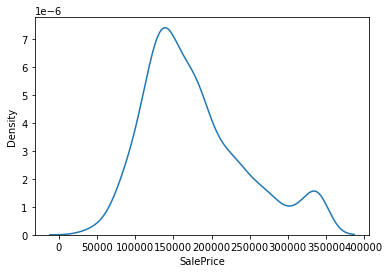

In [46]:
#Checking the distribution of Target Variable
sns.kdeplot(x='SalePrice',data=df_price)
plt.show()

In [47]:
#Checking for skewness of the target variable
df_price.SalePrice.skew()

0.8027863231337096

The target variable is slightly positively skewed.

In [48]:
#normalising the target variable
df_price['log_SalePrice']=np.log(df_price['SalePrice'])

In [49]:
df_price.log_SalePrice.skew()

-0.18514961386143938

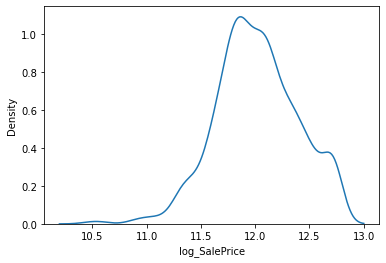

In [50]:
#plotting the distribution curve for log_SalePrice
sns.kdeplot(x='log_SalePrice',data=df_price)
plt.show()

In [51]:
#Creating a backup file
df_price1=df_price.copy()

We will do feature engineering and feature selection with df_price1 dataset

## 3. Feature Engineering

In [52]:
df_price1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,log_SalePrice
0,1,60,RL,65.0,8450.0,Pave,No Alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,No Fireplace,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,No Fence,None,0.0,2.0,2008.0,WD,Normal,208500.0,train,12.247694
1,2,20,RL,80.0,9600.0,Pave,No Alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,0.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,No Fence,None,0.0,5.0,2007.0,WD,Normal,181500.0,train,12.109011
2,3,60,RL,68.0,11250.0,Pave,No Alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,No Fence,None,0.0,9.0,2008.0,WD,Normal,223500.0,train,12.317167
3,4,70,RL,60.0,9550.0,Pave,No Alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,0.0,0.0,0.0,No Fence,None,0.0,2.0,2006.0,WD,Abnorml,140000.0,train,11.849398
4,5,60,RL,84.0,14260.0,Pave,No Alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,No Fence,None,0.0,12.0,2008.0,WD,Normal,250000.0,train,12.429216


In [53]:
# 1. Creating a new feature TotalSF

df_price1['TotalBsmtSF']=df_price1['BsmtFinSF1']+df_price1['BsmtFinSF2']+df_price1['BsmtUnfSF']

df_price1['TotalSF']=df_price1['TotalBsmtSF']+df_price1['1stFlrSF']+df_price1['2ndFlrSF']+df_price1['GrLivArea']

In [54]:
#Since we have created an aggregated column, we can remove the individual columns.
df_price1=df_price1.drop(['TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1)

In [55]:
# 2. We will create two other features by calcualting the Building Age and Remodeling Age

import datetime as dt

In [56]:
current_year=int(dt.datetime.now().year)
print(current_year)

2022


In [57]:
df_price1['BuildingAge']=current_year-df_price1['YearBuilt']
df_price1['RemodelAge']=current_year-df_price['YearRemodAdd']

In [58]:
#Checking for the added columns
df_price1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,log_SalePrice,TotalSF,BuildingAge,RemodelAge
0,1,60,RL,65.0,8450.0,Pave,No Alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,No Fireplace,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,No Fence,None,0.0,2.0,2008.0,WD,Normal,208500.0,train,12.247694,4276.0,19.0,19.0
1,2,20,RL,80.0,9600.0,Pave,No Alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0.0,0.0,0.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,No Fence,None,0.0,5.0,2007.0,WD,Normal,181500.0,train,12.109011,3786.0,46.0,46.0
2,3,60,RL,68.0,11250.0,Pave,No Alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,0.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,No Fence,None,0.0,9.0,2008.0,WD,Normal,223500.0,train,12.317167,4492.0,21.0,20.0
3,4,70,RL,60.0,9550.0,Pave,No Alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,0.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,0.0,0.0,0.0,No Fence,None,0.0,2.0,2006.0,WD,Abnorml,140000.0,train,11.849398,4190.0,107.0,52.0
4,5,60,RL,84.0,14260.0,Pave,No Alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,0.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,No Fence,None,0.0,12.0,2008.0,WD,Normal,250000.0,train,12.429216,5541.0,22.0,22.0


In [59]:
#Dropping off the YearBuilt and YearModAdd column since we do not require them now.

df_price1=df_price1.drop(['YearBuilt','YearRemodAdd'],axis=1)

In [60]:
df_price.shape

(2919, 81)

In [61]:
df_price1.shape

(2919, 75)

## 4. Dummy Encoding and Model Building with df_price dataset

In [62]:
#dummy encoding the categorical variables

In [63]:
df_price_dummy=pd.get_dummies(df_price,drop_first=True)

In [64]:
df_train=df_price_dummy.loc[df_price['source']=='train']
df_test=df_price_dummy.loc[df_price['source']=='test']

In [65]:
df_train.shape

(1460, 288)

In [66]:
df_test.shape

(1459, 288)

In [67]:
#Splitting into train and test data sets
df_train=df_train.drop(['source_train'],axis=1)
df_test=df_test.drop(['SalePrice','log_SalePrice','source_train'],axis=1)

In [68]:
df_train.shape

(1460, 287)

In [69]:
df_test.shape

(1459, 285)

In [70]:
#Splitting the data into X_train,y_train

In [71]:
X_train=df_train.drop(['SalePrice','log_SalePrice','Id'],axis=1)
X_train.shape

(1460, 284)

In [72]:
y_train=df_train[['SalePrice','log_SalePrice']]
y_train.shape

(1460, 2)

In [73]:
X_test=df_test.drop(['Id'],axis=1)
X_test.shape

(1459, 284)

### ModelBuilding using Linear Regression

In [74]:
#1. Using SalePrice as Target Variable

In [75]:
sc=StandardScaler()
lr=LinearRegression()

In [76]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [77]:
lr.fit(X_train_scaled,y_train['SalePrice'])

LinearRegression()

In [78]:
predicted_train_results=lr.predict(X_train_scaled)
predicted_test_results=lr.predict(X_test_scaled)

In [79]:
print('Training R2 Score is: ' ,r2_score(predicted_train_results,y_train['SalePrice']))

Training R2 Score is:  0.9441144098853382


In [80]:
print('Training RMSE is: ' ,rmse(predicted_train_results,y_train['SalePrice']))

Training RMSE is:  15456.14584474071


In [81]:
submit_lr_with_SalePrice=pd.DataFrame({'Id':df_test['Id'],'SalePrice':predicted_test_results })

In [82]:
submit_lr_with_SalePrice.to_csv('Housing_Prices.submit_lr_with_SalePrice.csv',index=False)

In [83]:
#2. Using log_SalePrice as Target Variable

In [84]:
lr1=LinearRegression()

lr1.fit(X_train_scaled,y_train['log_SalePrice'])

LinearRegression()

In [85]:
pred_train_results=lr1.predict(X_train_scaled)
predicted_train_results=np.exp(pred_train_results)
predicted_test_results=lr1.predict(X_test_scaled)

In [86]:
print('Training R2 Score is: ' ,r2_score(predicted_train_results,y_train['SalePrice']))

Training R2 Score is:  0.9440755836298077


In [87]:
print('Training RMSE is: ' ,rmse(predicted_train_results,y_train['SalePrice']))

Training RMSE is:  15620.49467842081


In [88]:
submit_lr_with_log_SalePrice=pd.DataFrame({'Id':df_test['Id'],'SalePrice':predicted_test_results })

In [89]:
submit_lr_with_log_SalePrice.to_csv('Housing_Prices.submit_lr_with_log_SalePrice.csv',index=False)

### ModelBuilding using Decision Tree 

In [90]:
#1. Using SalePrice as Target Variable

In [91]:
dt=DecisionTreeRegressor()

In [92]:
dt.fit(X_train_scaled,y_train['SalePrice'])

DecisionTreeRegressor()

In [93]:
predicted_train_results=dt.predict(X_train_scaled)
predicted_test_results=dt.predict(X_test_scaled)

In [94]:
print('Training R2 Score is: ' ,r2_score(predicted_train_results,y_train['SalePrice']))

Training R2 Score is:  1.0


In [95]:
print('Training RMSE is: ' ,rmse(predicted_train_results,y_train['SalePrice']))

Training RMSE is:  0.0


In [96]:
submit_dt_with_SalePrice=pd.DataFrame({'Id':df_test['Id'],'SalePrice':predicted_test_results })

In [97]:
submit_dt_with_SalePrice.to_csv('Housing_Prices.submit_dt_with_SalePrice.csv',index=False)

In [98]:
#2. Using log_SalePrice as Target Variable

In [99]:
dt1=DecisionTreeRegressor()
dt1.fit(X_train_scaled,y_train['log_SalePrice'])

DecisionTreeRegressor()

In [100]:
pred_train_results=dt1.predict(X_train_scaled)
predicted_train_results=np.exp(pred_train_results)
predicted_test_results=dt1.predict(X_test_scaled)

In [101]:
print('Training R2 Score is: ' ,r2_score(predicted_train_results,y_train['SalePrice']))

Training R2 Score is:  1.0


In [102]:
submit_dt_with_log_SalePrice=pd.DataFrame({'Id':df_test['Id'],'SalePrice':predicted_test_results })

In [105]:
submit_dt_with_log_SalePrice.to_csv('Housing_Prices.submit_dt_with_log_SalePrice.csv',index=False)

### ModelBuilding using Random Forest 

In [106]:
#1. Using SalePrice as Target Variable

In [107]:
rf=RandomForestRegressor()

In [108]:
rf.fit(X_train_scaled,y_train['SalePrice'])

RandomForestRegressor()

In [109]:
predicted_train_results=rf.predict(X_train_scaled)
predicted_test_results=rf.predict(X_test_scaled)

In [110]:
print('Training R2 Score is: ' ,r2_score(predicted_train_results,y_train['SalePrice']))

Training R2 Score is:  0.9820618987485922


In [111]:
submit_rf_with_SalePrice=pd.DataFrame({'Id':df_test['Id'],'SalePrice':predicted_test_results })

In [112]:
submit_rf_with_SalePrice.to_csv('Housing_Prices.submit_rf_with_SalePrice.csv',index=False)

In [113]:
#2. Using log_SalePrice as Target Variable

In [114]:
rf1=RandomForestRegressor()
rf1.fit(X_train_scaled,y_train['log_SalePrice'])

RandomForestRegressor()

In [115]:
pred_train_results=rf1.predict(X_train_scaled)
predicted_train_results=np.exp(pred_train_results)
predicted_test_results=rf1.predict(X_test_scaled)

In [116]:
print('Training R2 Score is: ' ,r2_score(predicted_train_results,y_train['SalePrice']))

Training R2 Score is:  0.9812288791271868


In [117]:
submit_rf_with_log_SalePrice=pd.DataFrame({'Id':df_test['Id'],'SalePrice':predicted_test_results })

In [118]:
submit_rf_with_log_SalePrice.to_csv('Housing_Prices.submit_rf_with_log_SalePrice.csv',index=False)

## 5. Dummy Encoding and Model Building with df_price1 dataset(with Feature Engineering)

In [119]:
#dummy encoding the categorical variables

In [120]:
df_price1_dummy=pd.get_dummies(df_price1,drop_first=True)

In [121]:
df_train1=df_price1_dummy.loc[df_price1['source']=='train']
df_test1=df_price1_dummy.loc[df_price1['source']=='test']

In [122]:
df_train1.shape

(1460, 282)

In [123]:
df_test1.shape

(1459, 282)

In [124]:
#Splitting into train and test data sets
df_train1=df_train1.drop(['source_train'],axis=1)
df_test1=df_test1.drop(['SalePrice','log_SalePrice','source_train'],axis=1)

In [125]:
df_train1.shape

(1460, 281)

In [126]:
df_test1.shape

(1459, 279)

In [127]:
#Splitting the data into X_train1,y_train1

In [128]:
X_train1=df_train1.drop(['SalePrice','log_SalePrice','Id'],axis=1)
X_train1.shape

(1460, 278)

In [129]:
y_train1=df_train1[['SalePrice','log_SalePrice']]
y_train1.shape

(1460, 2)

In [130]:
X_test1=df_test1.drop(['Id'],axis=1)
X_test1.shape

(1459, 278)

### ModelBuilding using Linear Regression

In [131]:
#1. Using SalePrice as Target Variable

In [132]:
sc=StandardScaler()
lr3=LinearRegression()

In [133]:
X_train1_scaled=sc.fit_transform(X_train1)
X_test1_scaled=sc.transform(X_test1)

In [134]:
lr3.fit(X_train1_scaled,y_train1['SalePrice'])

LinearRegression()

In [135]:
predicted_train_results=lr3.predict(X_train1_scaled)
predicted_test_results=lr3.predict(X_test1_scaled)

In [136]:
print('Training R2 Score is: ' ,r2_score(predicted_train_results,y_train1['SalePrice']))

Training R2 Score is:  0.9402305224925656


In [137]:
print('Training RMSE is: ' ,rmse(predicted_train_results,y_train['SalePrice']))

Training RMSE is:  15958.815146705312


In [138]:
submit_lr_with_feature_engineering_SalePrice=pd.DataFrame({'Id':df_test['Id'],'SalePrice':predicted_test_results })

In [139]:
submit_lr_with_feature_engineering_SalePrice.to_csv('Housing_Prices.submit_lr_with_feature_engineering_SalePrice.csv',index=False)

In [140]:
#2. Using log_SalePrice as Target Variable

In [141]:
lr4=LinearRegression()

lr4.fit(X_train1_scaled,y_train1['log_SalePrice'])

LinearRegression()

In [142]:
pred_train_results=lr4.predict(X_train1_scaled)
predicted_train_results=np.exp(pred_train_results)
predicted_test_results=lr4.predict(X_test1_scaled)

In [143]:
print('Training R2 Score is: ' ,r2_score(predicted_train_results,y_train1['SalePrice']))

Training R2 Score is:  0.9380574861830066


In [144]:
print('Training RMSE is: ' ,rmse(predicted_train_results,y_train['SalePrice']))

Training RMSE is:  16438.977204757644


In [145]:
submit_lr_with_feature_engineering_log_SalePrice=pd.DataFrame({'Id':df_test['Id'],'SalePrice':predicted_test_results })

In [146]:
submit_lr_with_feature_engineering_log_SalePrice.to_csv('Housing_Prices.submit_lr_with_feature_engineering_log_SalePrice.csv',index=False)